In [173]:
#
# Import Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
nltk.download('punkt')
nltk.download('stopwords')


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
######################################################################################### 


##PATHS##

pth=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\ml_lres\lab_hate_speech\\'



##SETUP##
sns.set()
random.seed(1234)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 10)})
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth", None)
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=0)
## — — — — — — to get rid of warning messages
warnings.filterwarnings('ignore') 
## — — — — — — — Remove scientific notations and display numbers with 2 decimal points instead — — — — — — — 
pd.options.display.float_format = '{:,.2f}'.format
## — — — — — — — Update default background style of plots — — — — — — — 
#sns.set_style(style='darkgrid')


## FUNCTIONS
def remove_punctuation(data):
    data = np.char.replace(data, "-", ' ')
    data = np.char.replace(data, "/", ' ')
    data = np.char.replace(data, "'s", '')
    data = np.char.replace(data, "'S", '')
    symbols = "!\"#$%&()*+<=>@[\]^_`{|}~”.,:;"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], '')
    return str(data)

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text


def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return str(new_text)

def convert_lower_case(data):
    return str(np.char.lower(data))


def stemming(data):
    stemmer= PorterStemmer()

    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

##CANVAS VARIABLES##
e_user = "senekal_nodes_txt2.csv"



##CTO VARIABLES##


######################################################################################### 
##NODE DATA##


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SALDRU1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SALDRU1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
df_user = pd.read_csv(pth + e_user, sep=";")
df_user["text"] = df_user["text"].astype(str)
print(df_user.shape)
df_user.head()

(6015, 4)


,id,Position_5,Cluster,text
0,1369156226123186177,Minor,2,@nomsa_maseko @MbuyiseniNdlozi Imagine if this was a white cop. The EFF would be marching to the police station in force to demand his head. #senekal.
1,1369156226123186177,Minor,2,@EFFSouthAfrica @Julius_S_Malema What a joke. EFF go get some tissues. You are masters at intimidation..#Clicks #senekal
2,1369156226123186177,Minor,2,@collensedibe @EFFSouthAfrica @SAPoliceService This is disgusting. If a white man did this the whole WORLD would hear about it. Why does the EFF not March on this area like #senekal ?
3,1369156226123186177,Minor,2,@MYANC @MbuyiseniNdlozi\n@Julius_S_Malema if #BlackLivesMatter then why does EFF and ANC do nothing while thousands of black people kill black people every month. EFF would rather March on #senekal to score political points by raising race hate. Sick. https://t.co/S8lPm7GwWj
4,1369156226123186177,Minor,2,@MbuyiseniNdlozi Why dont you assemble your ground forces and 'attack' like #senekal or #clicks ? EFF only know the racist card or the victim card.


In [172]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
df_user["text2"] = df_user["text"]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
#remove_rt = lambda x: re.sub('@\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
df_user["text2"] = df_user.text2.map(remove_rt).map(rt)
df_user["text2"] = df_user.text2.str.lower()
############

#df_user = df_user.assign(text2=lambda x:x['text2'].apply(lambda s: re.sub(r'\\w+:\\/{2}[\\d\\w-]+(\\.[\\d\\w-]+)*(?:(?:\\/[^\\s/]*))*', '', s)))
############
df_user.head(5)

#match = re.search(df_user["text2"],"^(RT)")
#if df_user["text2"].re.search()

,id,Position_5,Cluster,text,text2,stem_text2
0,1369156226123186177,Minor,2,@nomsa_maseko @MbuyiseniNdlozi Imagine if this was a white cop. The EFF would be marching to the police station in force to demand his head. #senekal.,maseko imagine if this was a white cop the eff would be marching to the police station in force to demand his head senekal,maseko imagin thi wa white cop eff would march polic station forc demand hi head senek
1,1369156226123186177,Minor,2,@EFFSouthAfrica @Julius_S_Malema What a joke. EFF go get some tissues. You are masters at intimidation..#Clicks #senekal,s malema what a joke eff go get some tissues you are masters at intimidation clicks senekal,malema joke eff go get tissu master intimid click senek
2,1369156226123186177,Minor,2,@collensedibe @EFFSouthAfrica @SAPoliceService This is disgusting. If a white man did this the whole WORLD would hear about it. Why does the EFF not March on this area like #senekal ?,this is disgusting if a white man did this the whole world would hear about it why does the eff not march on this area like senekal,thi disgust white man thi whole world would hear whi doe eff march thi area like senek
3,1369156226123186177,Minor,2,@MYANC @MbuyiseniNdlozi\n@Julius_S_Malema if #BlackLivesMatter then why does EFF and ANC do nothing while thousands of black people kill black people every month. EFF would rather March on #senekal to score political points by raising race hate. Sick. https://t.co/S8lPm7GwWj,s malema if blacklivesmatter then why does eff and anc do nothing while thousands of black people kill black people every month eff would rather march on senekal to score political points by raising race hate sick,malema blacklivesmatt whi doe eff anc noth thousand black peopl kill black peopl everi month eff would rather march senek score polit point rais race hate sick
4,1369156226123186177,Minor,2,@MbuyiseniNdlozi Why dont you assemble your ground forces and 'attack' like #senekal or #clicks ? EFF only know the racist card or the victim card.,why dont you assemble your ground forces and attack like senekal or clicks eff only know the racist card or the victim card,whi dont assembl ground forc attack like senek click eff onli know racist card victim card


In [177]:

clean_sentences = [remove_stop_words(sent) for sent in list(df_user['text2'])]
df_user['clean_text2'] = clean_sentences


stem_sentences = [remove_stop_words(stemming(sent)) for sent in list(df_user['text2'])]
df_user['stem_text2'] = stem_sentences

df_user.head()

,id,Position_5,Cluster,text,text2,stem_text2,clean_text2
0,1369156226123186177,Minor,2,@nomsa_maseko @MbuyiseniNdlozi Imagine if this was a white cop. The EFF would be marching to the police station in force to demand his head. #senekal.,maseko imagine if this was a white cop the eff would be marching to the police station in force to demand his head senekal,maseko imagin thi wa white cop eff would march polic station forc demand hi head senek,maseko imagine white cop eff would marching police station force demand head senekal
1,1369156226123186177,Minor,2,@EFFSouthAfrica @Julius_S_Malema What a joke. EFF go get some tissues. You are masters at intimidation..#Clicks #senekal,s malema what a joke eff go get some tissues you are masters at intimidation clicks senekal,malema joke eff go get tissu master intimid click senek,malema joke eff go get tissues masters intimidation clicks senekal
2,1369156226123186177,Minor,2,@collensedibe @EFFSouthAfrica @SAPoliceService This is disgusting. If a white man did this the whole WORLD would hear about it. Why does the EFF not March on this area like #senekal ?,this is disgusting if a white man did this the whole world would hear about it why does the eff not march on this area like senekal,thi disgust white man thi whole world would hear whi doe eff march thi area like senek,disgusting white man whole world would hear eff march area like senekal
3,1369156226123186177,Minor,2,@MYANC @MbuyiseniNdlozi\n@Julius_S_Malema if #BlackLivesMatter then why does EFF and ANC do nothing while thousands of black people kill black people every month. EFF would rather March on #senekal to score political points by raising race hate. Sick. https://t.co/S8lPm7GwWj,s malema if blacklivesmatter then why does eff and anc do nothing while thousands of black people kill black people every month eff would rather march on senekal to score political points by raising race hate sick,malema blacklivesmatt whi doe eff anc noth thousand black peopl kill black peopl everi month eff would rather march senek score polit point rais race hate sick,malema blacklivesmatter eff anc nothing thousands black people kill black people every month eff would rather march senekal score political points raising race hate sick
4,1369156226123186177,Minor,2,@MbuyiseniNdlozi Why dont you assemble your ground forces and 'attack' like #senekal or #clicks ? EFF only know the racist card or the victim card.,why dont you assemble your ground forces and attack like senekal or clicks eff only know the racist card or the victim card,whi dont assembl ground forc attack like senek click eff onli know racist card victim card,dont assemble ground forces attack like senekal clicks eff know racist card victim card


In [178]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from collections import Counter

Minor


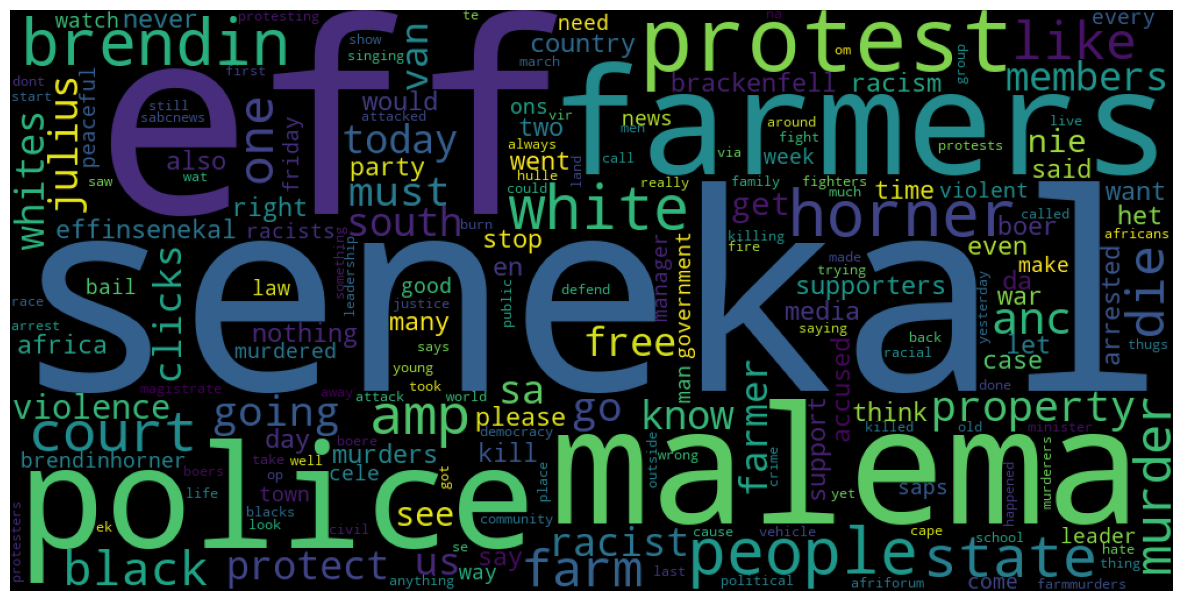

Informer


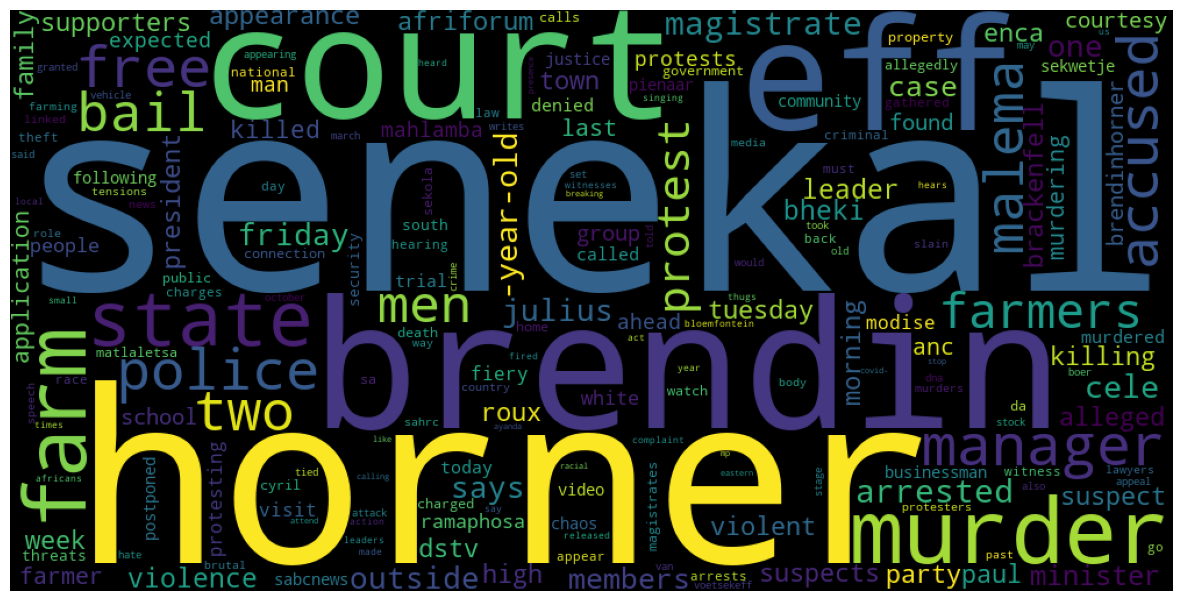

Leader


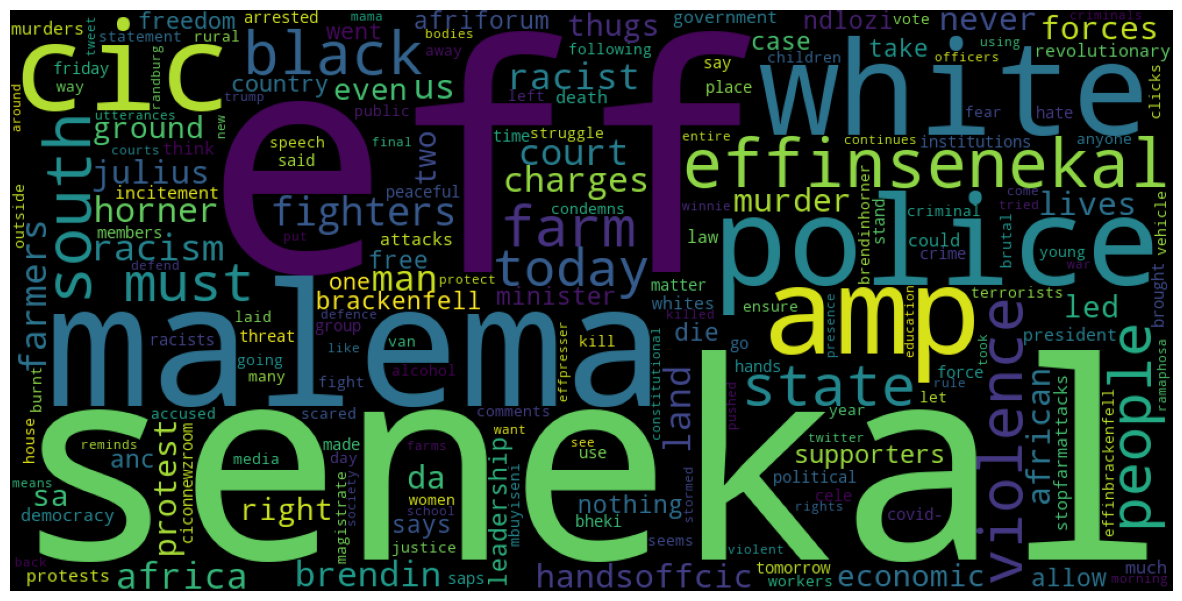

Spreader


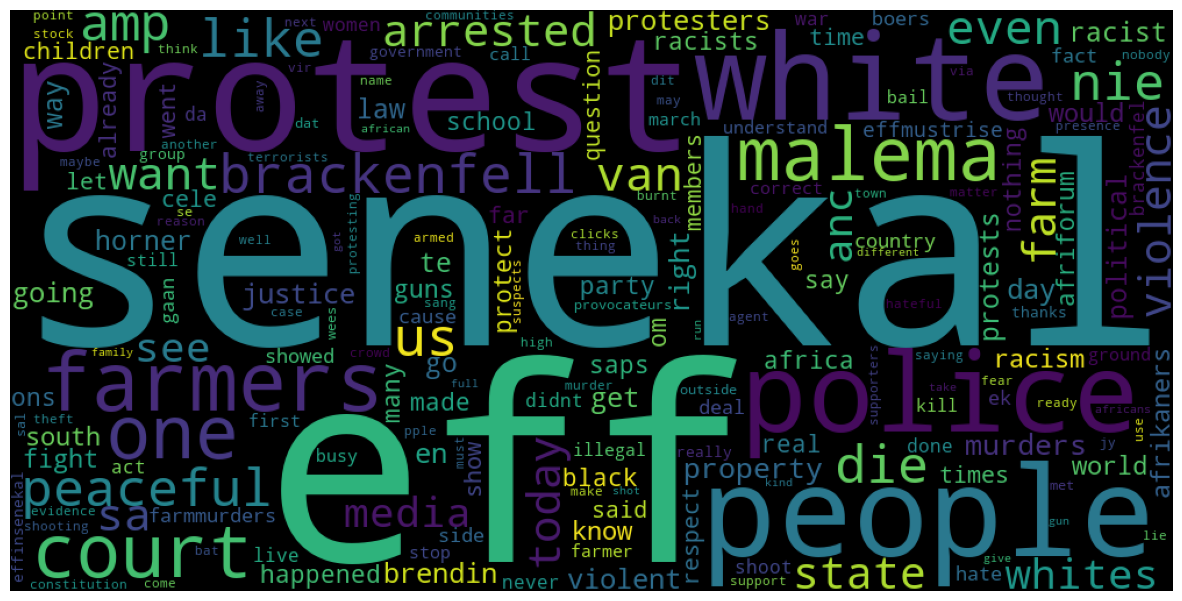

Observer


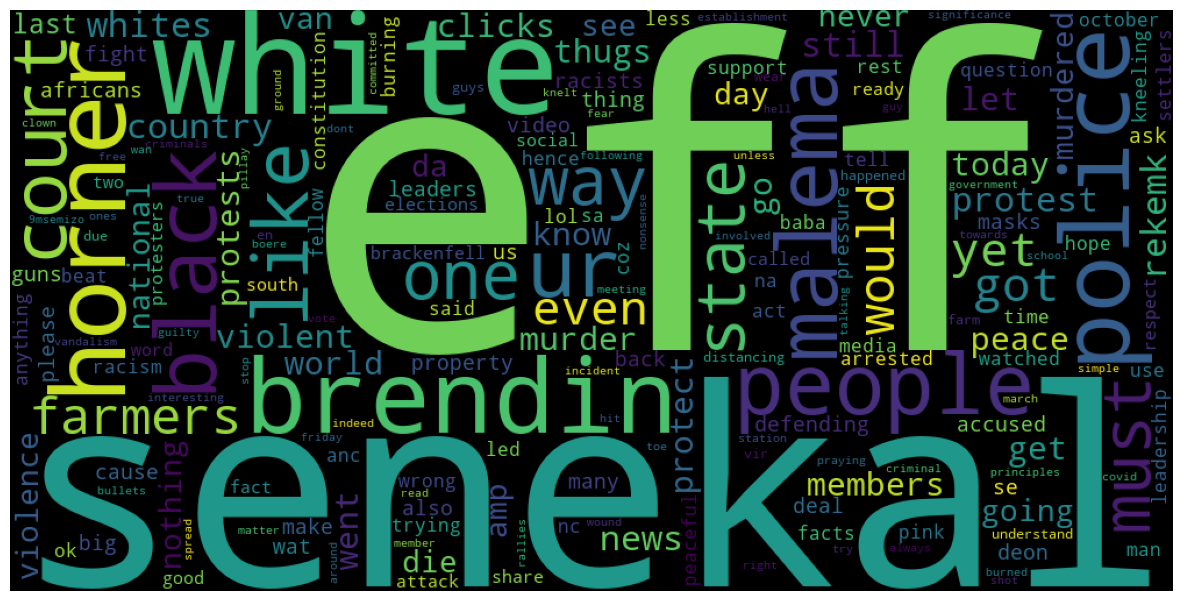

Activator


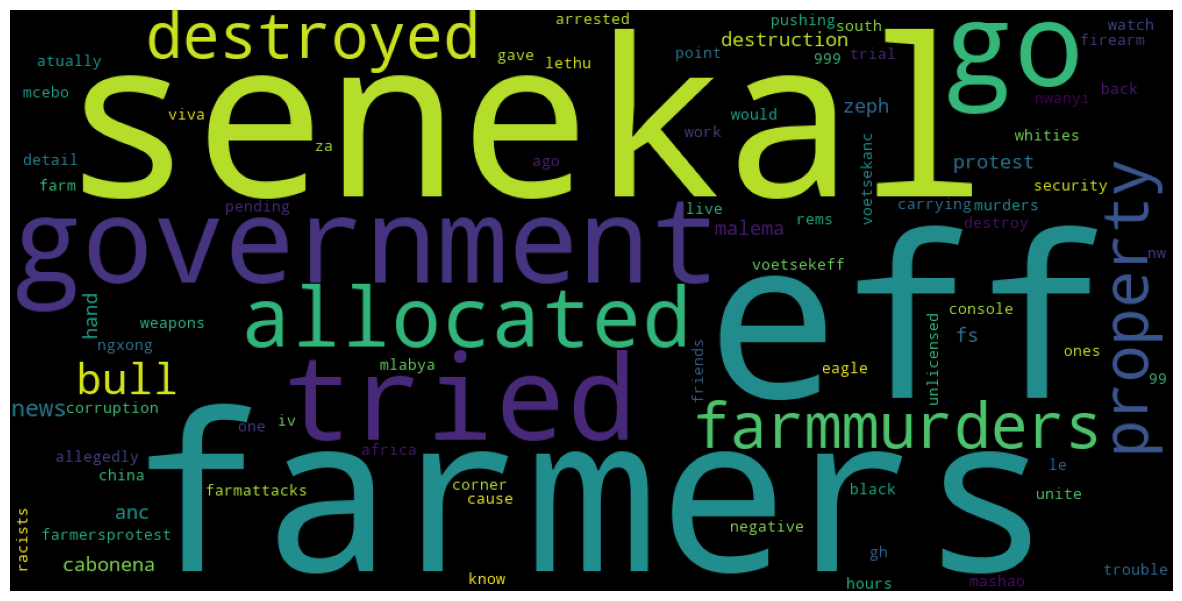

In [187]:
for i in list(df_user['Position_5'].unique()):
    print(i)
    role_tweets = ' '.join(text for text in df_user['clean_text2'][df_user['Position_5']==i])
    #convert it to dictionary with values and its occurences
    my_list = list(role_tweets.split(" "))
    #print(my_list)
    
    #convert it to dictionary with values and its occurences
    word_could_dict=Counter(my_list)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    #plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()
    

In [158]:
#df = df.query('~Text.str.contains("amber|heard|johnny|depp|shannon|curry")')
#sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
sentiment_pipeline = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

#cardiffnlp/twitter-roberta-base-sentiment-latest

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [159]:
import pickle
#I also noticed some tweets containing URLs. I am just going to remove all the URLs in the tweets.

#df_user = df_user.assign(sentiment=lambda x: x['text2'].apply(lambda s: sentiment_pipeline(s)))
#pickle_obj = pickle.dumps(df_user)
#df_user = pickle.loads(pickle_obj)
#df_user.to_csv(pth+'sentiment_hate_speech.csv')

In [160]:
df_user1.head()

NameError: name 'df_user1' is not defined

In [ ]:

import ast

df_user1 = pd.read_csv(pth+'sentiment_hate_speech.csv')


df_user1['sentiment2'] = [ast.literal_eval(i) for i in df_user['sentiment']]
df_user1 = df_user1.assign(sentiment_label=lambda x: x['sentiment2'].apply(lambda s: s[0]['label']))
df_user1 = df_user1.assign(sentiment_score=lambda x: x['sentiment2'].apply(lambda s: s[0]['score']))
df_user1.head()

In [ ]:

role_lst = ['Minor','Informer', 'Leader', 'Spreader', 'Observer', 'Activator']



df_user = df_user1.assign(
    sentiment_label=np.where(
        df_user1['sentiment_label']=='negative', 'NEGATIVE', np.where(
            df_user1['sentiment_label']=='positive', 'POSITIVE', 'NEUTRAL'
        )
    )
)

df_minor = df_user1.loc[df_user1['Position_5']=='Minor']
df_informer = df_user1.loc[df_user1['Position_5']=='Informer']
df_leader = df_user1.loc[df_user1['Position_5']=='Leader']
df_spreader = df_user1.loc[df_user1['Position_5']=='Spreader']
df_observer = df_user1.loc[df_user1['Position_5']=='Observer']
df_activator = df_user1.loc[df_user1['Position_5']=='Activator']
                       
                       

In [ ]:
df_user1['sentiment_label'].value_counts()

In [ ]:
dfc = pd.concat([
    df_minor.query('sentiment_score>0')['sentiment_label'].value_counts(),
    df_informer.query('sentiment_score>0')['sentiment_label'].value_counts(),
    df_leader.query('sentiment_score>0')['sentiment_label'].value_counts(),
    df_spreader.query('sentiment_score>0')['sentiment_label'].value_counts(),
    df_observer.query('sentiment_score>0')['sentiment_label'].value_counts(),
    df_activator.query('sentiment_score>0')['sentiment_label'].value_counts()
], axis=1)
dfc.columns = ['Minor','Informer', 'Leader', 'Spreader', 'Observer', 'Activator']
dfc

--------------------------------

##Sentiment Analysis

Run the following lines of code to import the NLTK library, along with the SentimentIntensityAnalyzer (SID) module.

The SID module takes in a string and returns a score in each of these four categories — positive, negative, neutral, and compound.

The compound score is calculated by normalizing the positive, negative, and neutral scores. If the compound score is closer to 1, then the Tweet can be classified as positive. If it is closer to -1, then the Tweet can be classified as negative.

In [120]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SALDRU1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\SALDRU1\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [154]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    
df_user['text2'] = df_user['text'].apply(cleaner)

In [ ]:
sentence = "this is disgusting if a white man did this the whole world would hear about it why does the eff not march on this area like senekal"
sid.polarity_scores(sentence)['compound']

-------------------------------

In [99]:
#Calculating Negative, Positive, Neutral and Compound values
df_user[['polarity', 'subjectivity']] = df_user['text2'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df_user['text2'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df_user.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df_user.loc[index, 'sentiment'] = "positive"
    else:
        df_user.loc[index, 'sentiment'] = "neutral"
        df_user.loc[index, 'neg'] = neg
        df_user.loc[index, 'neu'] = neu
        df_user.loc[index, 'pos'] = pos
        df_user.loc[index, 'compound'] = comp
df_user.head(10)

,id,text,text2,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1000097360138178561,"RT @Hluvukanii: 😂 Today they're praying, last time they were vandalizing. EFF know how to put hooligans in their place. #Senekal https://t.…",today they re praying last time they were vandalizing eff know how to put hooligans in their place senekal,0.00,0.07,positive,NaN,NaN,NaN,NaN
1,1000194740,RT @justcallmesihle: Rapists - Roaming free\nKillers - Roaming free\nSenekal farmers - Roaming free\nDrug and human traffickers roaming free…,rapists - roaming free killers - roaming free senekal farmers - roaming free drug and human traffickers roaming free,0.32,0.66,positive,NaN,NaN,NaN,NaN
2,100019857,RT @LoneStar_Skye: How. Many. More. Farmers???\n\nRIP Brendin Horner 💔 https://t.co/CDyX4IWnNm,how many more farmers rip brendin horner,0.50,0.50,neutral,0.00,1.00,0.00,0.00
3,1000274007915155456,"RT @CWeillRaynal: Brendin Horner, fermier blanc sud-africain de 21 ans, assassiné le 2 octobre, retrouvé pendu à un poteau : dans combien…",brendin horner fermier blanc sud-africain de ans assassin le octobre retrouv pendu un poteau dans combien,0.00,0.00,neutral,0.00,1.00,0.00,0.00
4,1000416117125468162,RT @POWER987News: WATCH: EFF supporters and farmers stand toe-to-toe in #Senekal. #BrendinHorner https://t.co/RO1ECfTnKLRT @AbongileDumako: WATCH: @Julius_S_Malema thanks @EFFSouthAfrica members for their bravery and participated in today's protest in #Seneka…,watch eff supporters and farmers stand toe-to-toe in senekal brendinhorner watch s malema thanks members for their bravery and participated in today s protest in seneka,0.20,0.20,positive,NaN,NaN,NaN,NaN
5,1000463123281793024,RT @the_alexios: The way white farmers of #Senekal are playing victim in this crisis is unsettling.\n\nA week ago they stormed into a courtho…,the way white farmers of senekal are playing victim in this crisis is unsettling a week ago they stormed into a courtho,-0.19,0.25,negative,NaN,NaN,NaN,NaN
6,1000510947792846854,📷 #FarmMurders #EFF #Racism #BlackRacism #StopFarmKillings #JuliusMalema #NoFarmersNoFood #FarmerLivesMatter #WhiteGenocide #BrendinHorner #SenekalProtests #Senekal #SenekalRiots #ViolentProtests #AndrePienaar #Keisha #KeishasGoneWild... https://t.co/ybe2nIod3Ehttps://t.co/N4a2g7yjM9\n\n#KhayaLangile #EFF #BrendinHorner #Senekal #SenekalRiots #SenekalProtests #ViolentProtests #PaulRoux📷 #TimesLiveZa #Senekal #SenekalRiots #AndrePienaar #BrendinHorner #JusticeForBrendinHorner #SayTheirNames #FarmMurders #EFF #Afriforum https://t.co/bDL3YfWtPE https://t.co/bQt9Ai54iy#TimesLiveZa #Senekal #SenekalRiots #AndrePienaar #BrendinHorner #JusticeForBrendinHorner #SayTheirNames #FarmMurders #EFF #Afriforum https://t.co/WmgMAtVobF📷 #MeinPoephol #JuliusMalema #EFF #ANC #Senekal #BrendinHorner #SenekalRiots #BoerLivesMatter #FarmerLivesMatter #NoFarmersNoFood #StopFarmMurders #AllSouthAfricanLivesMatter #alllivesmatter✊🏻✊🏼✊🏽✊🏾✊🏿... https://t.co/3oYfQPjrj8#MeinPoephol #JuliusMalema #EFF #ANC #Senekal #BrendinHorner #SenekalRiots #BoerLivesMatter #FarmerLivesMatter #NoFarmersNoFood #StopFarmMurders #AllSouthAfricanLivesMatter #alllivesmatter✊🏻✊🏼✊🏽✊🏾✊🏿 https://t.co/dqnXwGRAgy@someblackg @HunterAvallone3 \n@TheDixonWhite\nCan you guys do a video on #BrendinHorner and the #SenekalProtests?\n\n#Senekal #Sekwetjemahlamba #JuliusMalema #JuliassMalema\n#EFF #EFFThugs #RacialTensions #SouthAfrica https://t.co/e7jvYtMaxBhttps://t.co/LomstJHTmF\n\n#MaleqhoaSithole #Sekwetjemahlamba\n\nListen to this idiot.\n\n#BrendinHornerhttps://t.co/gIFrbh4NOh\n\n#BhekiCele #SenekalProtests #WhiteRioters #SenekalRiots #WhiteLivesMatter #BlackLivesMatter #AllLivesMatter #BrendinHorner,farmmurders eff racism blackracism stopfarmkillings juliusmalema nofarmersnofood farmerlivesmatter whitegenocide brendinhorner senekalprotests senekal senekalriots violentprotests andrepienaar keisha keishasgonewild khayalangile eff brendinhorner senekal senekalriots senekalprotests violentprotests paulroux timesliveza s

In [ ]:
#finding polarity for each comment
polarity=[]
for i in df_user['text']:
    try:
        polarity.appended(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [59]:
for i in polarity:
    if i >0:
        print(i)

In [60]:
user_txt = df_user['text'].to_list()

Data Cleaning
The next step consists of cleaning up the tweets we obtained in the previous section. Social media data usually contains a lot of noise so multiple cleaning tasks must be carried out for further data processing. As shown below, we eliminate URLs, hashtags, and mentions from tweets using regular expressions in Python.

In this case, we decided to remove @ signs (mention) and # signs (hashtag) leaving the original term without modification (e.g. #happy is converted into happy). We decided to keep the terms of the hashtags because on many occasions these terms are used within a sentence and are necessary to understand its meaning (e.g. I am really #happy with the new season). Additionally, we will also remove punctuation marks in the data.

For the cleaning of tweets, we define the function clean_tweet. This function removes URLs, punctuation marks, #, and @ from a text (in this case a tweet).

In [61]:
def clean_tweet(tweet):
    '''
    Function to clean a tweet text by removing the links, punctuations, hashtags, and mentions symbols
    using regex expressions.
    Parameters:
       tweet (string): Tweet text to transform.
    Returns:
       tweet_cleaned (string): Tweet without links, punctuations, hashtags, and mentions symbols. 
    """
    ''' U+2070 
    # convert the tweet text to lowercase letters
    tweet_lower = tweet.lower()
    # remove links, punctuations, hashtags, and mentions
    tweet_cleaned = re.sub(u"(http\S+)|([“”!?])|([#@])", "", tweet_lower)
    
    return tweet_cleaned

After applying the function to each of the tweets, we visualize the results.

In [62]:
# we apply the funtion clean_tweet to each tweet
user_text_cleaned = [clean_tweet(tweet) for tweet in user_txt]
# we visualize the first 10 tweets
print(user_text_cleaned[:10])

["rt hluvukanii: 😂 today they're praying, last time they were vandalizing. eff know how to put hooligans in their place. senekal ", 'rt justcallmesihle: rapists - roaming free\nkillers  - roaming free\nsenekal farmers - roaming free\ndrug and human traffickers roaming free…', 'rt lonestar_skye: how. many. more. farmers\n\nrip brendin horner 💔 ', 'rt cweillraynal: brendin horner, fermier blanc  sud-africain de 21 ans, assassiné le 2 octobre, retrouvé pendu à un poteau : dans combien…', "rt power987news: watch: eff supporters and farmers stand toe-to-toe in senekal. brendinhorner  abongiledumako: watch: julius_s_malema thanks effsouthafrica members for their bravery and participated in today's protest in seneka…", 'rt the_alexios: the way white farmers of senekal are playing victim in this crisis is unsettling.\n\na week ago they stormed into a courtho…', '📷 farmmurders eff racism blackracism stopfarmkillings juliusmalema nofarmersnofood farmerlivesmatter whitegenocide brendinhorner sene

In [63]:
def opinion_words_txt2dict(opinion_words_file_path):
    """
    Converts a txt file of opinion words into a Python dictionary.
    Parameters:
       opinion_words_file_path (string): Path where the txt file is located.
    Returns:
       opinion_words_dictionary (dict): Python dictionary containing the opinion words.  
    """
    opinion_words_dictionary = dict()

    with open(opinion_words_file_path, 'r') as of:
        # we read the content of the file in the form of a list where each element is a line of the file
        opinion_words = of.readlines()
        # we iterate through each line of the file (a line contains an opinion word and its polarity)
        for opinion_word in opinion_words:
            word, polarity = opinion_word.strip().split('\t')
            # we add each opinion word and its polarity to the Python dictionary
            opinion_words_dictionary[word] = int(polarity)
            
    return opinion_words_dictionary

In [64]:

# we read the AFINN dictionary file and store the content in a Python dictionary called opinion_words_dictionary
opinion_words_file_path = 'AFINN-111.txt'
opinion_words_dictionary = opinion_words_txt2dict(opinion_words_file_path)

# we visualize the dictionary
#print(opinion_words_dictionary)

In [65]:
# we merge both dictionaries into a unique dictionary
polarity_dictionary = {**opinion_words_dictionary}

def tweet_polarity(tweet, polarity_dictionary):
    """
    Computes the polarity of a tweet as the sum of the polarity of each of the opinion words and emojis in the tweet.
    Parameters:
       tweet (string): Tweet to analyze.
       polarity_dictionary(dictionary): Dictionary with the polarity of the opinion words and emojis.
    Returns:
       The polarity of a tweet (tweet_polarity), if the tweet contains opinion words or emojis, otherwise, None.  
    """
    # we get the polarity of the opinion words and emojis of the tweet
    word_polarities = [polarity_dictionary.get(word) for word in tweet.split()
                        if polarity_dictionary.get(word)]
    
    # if word_polarities is not empty we return the sum of the polarities of the opinion words and emojis of the tweet
    if word_polarities:
        # we calculate the polarity of a tweet as the sum of the polarities of its opinion words and emojis
        tweet_polarity = np.sum(word_polarities)
        return tweet_polarity
    
    # if word_polarities is empty, meaning there are not words with polarity in the tweet, the function returns None
    else:
        return None

In [66]:
# we compute the polarity of each tweet and we store the data in a list
polarities = [tweet_polarity(tweet, polarity_dictionary) for tweet in user_text_cleaned]

# we visualize the polarity of the first 10 tweets
polarities[:10]

[-2, 3, None, None, 1, -6, -3, -1, None, -2]

In [100]:
# we store the tweet_text and its polarity in a dataframe for further analysis
df_user['text_2'] = user_text_cleaned
df_user['polarity'] = polarities

# we visualize the first 5 tweets
df_user[20:40]

,id,text,text2,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_2
20,1001446821405843456,"RT @LouisRielFrance: La sauvagerie avec laquelle a été assassiné Brendin Horner, jeune paysan blanc de 21 ans en #AfriqueduSud, dépasse l'e…",la sauvagerie avec laquelle a t assassin brendin horner jeune paysan blanc de ans en afriquedusud d passe l e,NaN,0.00,neutral,0.00,1.00,0.00,0.00,"rt louisrielfrance: la sauvagerie avec laquelle a été assassiné brendin horner, jeune paysan blanc de 21 ans en afriquedusud, dépasse l'e…"
21,1001460244466356224,RT @justcallmesihle: Rapists - Roaming free\nKillers - Roaming free\nSenekal farmers - Roaming free\nDrug and human traffickers roaming free…,rapists - roaming free killers - roaming free senekal farmers - roaming free drug and human traffickers roaming free,3.00,0.66,positive,NaN,NaN,NaN,NaN,rt justcallmesihle: rapists - roaming free\nkillers - roaming free\nsenekal farmers - roaming free\ndrug and human traffickers roaming free…
22,1001494989220786177,RT @AzraKarim: But who remembers how SAPS were at the Senekal protest? We don’t live in an equal South Africa. #Witsasinamali https://t.co/…,but who remembers how saps were at the senekal protest we don t live in an equal south africa witsasinamali,-2.00,0.38,negative,NaN,NaN,NaN,NaN,rt azrakarim: but who remembers how saps were at the senekal protest we don’t live in an equal south africa. witsasinamali
23,1001517960647802880,"RT @CWeillRaynal: Brendin Horner, fermier blanc sud-africain de 21 ans, assassiné le 2 octobre, retrouvé pendu à un poteau : dans combien…RT @CNEWS: #BrendinHorner fermier blanc de 21 ans, retrouvé pendu à un poteau : que sait-on de ce meurtre qui bouleverse l'#Afrique du Sud…",brendin horner fermier blanc sud-africain de ans assassin le octobre retrouv pendu un poteau dans combien brendinhorner fermier blanc de ans retrouv pendu un poteau que sait-on de ce meurtre qui bouleverse l afrique du sud,NaN,0.00,neutral,0.00,1.00,0.00,0.00,"rt cweillraynal: brendin horner, fermier blanc sud-africain de 21 ans, assassiné le 2 octobre, retrouvé pendu à un poteau : dans combien…rt cnews: brendinhorner fermier blanc de 21 ans, retrouvé pendu à un poteau : que sait-on de ce meurtre qui bouleverse l'afrique du sud…"
24,1001525900356280320,RT @AdvoBarryRoux: The media has its own agenda in Senekal. They zoom in &amp; talk of EFF knobkirries and golf sets but not of whites with gun…RT @AdvoBarryRoux: EFF members stand toe-to-toe to Racists in #Senekal. #EFFinSenekal https://t.co/lpS4HvkjVF,the media has its own agenda in senekal they zoom in amp talk of eff knobkirries and golf sets but not of whites with gun eff members stand toe-to-toe to racists in senekal effinsenekal,-3.00,1.00,negative,NaN,NaN,NaN,NaN,rt advobarryroux: the media has its own agenda in senekal. they zoom in &amp; talk of eff knobkirries and golf sets but not of whites with gun…rt advobarryroux: eff members stand toe-to-toe to racists in senekal. effinsenekal
25,1001528422215180288,RT @54Battalion: #Senekal they are now shaking EFF is coming Boys #EFFinSenekal https://t.co/M8CmM9JCzn,senekal they are now shaking eff is coming boys effinsenekal,NaN,0.00,negative,NaN,NaN,NaN,NaN,rt 54battalion: senekal they are now shaking eff is coming boys effinsenekal
26,1001581233103605762,RT @justcallmesihle: Rapists - Roaming free\nKillers - Roaming free\nSenekal farmers - Roaming free\nDrug and human traffickers roaming free…,rapists - roaming free killers - roaming free senekal farmers - roaming free drug and human traffickers roaming free,3.00,0.66,positive,NaN,NaN,NaN,NaN,rt justcallmesihle: rapists - roaming free\nkillers - roaming free\nsenekal farmers - roaming free\ndrug and human traffickers roaming free…
27,1001602018891399169,RT @justcallmesihle: Rapists - Roaming free\nKillers - Roaming free\nSenekal farmers - Roaming free\nDrug and human traffickers roaming free…,rapists - roaming free killers - roaming free senekal farmers - roaming free drug and human traf

As shown above, the mean polarity is positive, meaning the reaction of the public after the release of the second season was favorable. However, more interesting than simply knowing the mean of polarities is to know the distribution of probabilities, for example, by using a histogram.

In [70]:

print(df_user['polarity'].mean())

#sorted(df_user['polarity'].to_list(),reverse=True)

-4.41357274887774

In [71]:
# we visulize the polarity of the tweets with the #bridgerton
df_user.polarity.plot(kind='hist')
# we set the title of the plot
plt.title('Polarity of the tweets with the #bridgerton', loc='left', fontsize=14)

Text(0.0, 1.0, 'Polarity of the tweets with the #bridgerton')

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)
#keyword = input(“Please enter keyword or hashtag to search: “)
#noOfTweet = int(input (“Please enter how many tweets to analyze: “))
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')